In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [2]:
def text_wc(tweets_col,title):
    tweets_text = " ".join(tweets_col.values.tolist())
    
    tweet_wc = WordCloud(background_color="white").generate(tweets_text)

    plt.imshow(tweet_wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [71]:
input_dir = "C:/Users/DELL/UOR_Code_Files/Stats for Machine Learning/Kaggle Assignment/"
training_input_file = "Processed_Training_Data.csv"
#testing_input_file = "congressional_tweet_test_data.csv"
training_input_path = input_dir+training_input_file
testing_input_path = input_dir + testing_input_file
#random.seed(265)  #Setting random seed
validation_analysis = "Validation_Output.csv"

In [72]:
validation_data = pd.read_csv(validation_analysis)
validation_data.head()

,Unnamed: 0,Text,Prediction_Party_Id,Observed_Party_Id
0,322010,farmer ask #snap used wedge issue blame group ...,D,D
1,66099,#nationalparkweek last park million visitor ce...,D,D
2,296041,soon heading #senatefloor speak #fy19ndaa prov...,R,R
3,521595,bottom line #goptaxscam raise tax million amer...,D,D
4,197278,unemployment rate since clear #taxreformworks ...,R,R


In [73]:
mislabelled_R = validation_data[(validation_data["Observed_Party_Id"]=="R") & (validation_data["Prediction_Party_Id"]=="D")]
mislabelled_R

,Unnamed: 0,Text,Prediction_Party_Id,Observed_Party_Id
47,8539,radiobilingue repjeffdenham #immigrationreform...,D,R
80,138598,incredible meeting eva dan team notmytollroado...,D,R
96,101364,essential branch reaffirms men woman field fam...,D,R
110,555315,barton also passionate education prison reform...,D,R
119,440208,congrats representing bostonmarathon incl fell...,D,R
...,...,...,...,...
177759,256727,twin kick #postseason tonight#wildcard game #w...,D,R
177777,196348,taking selftermlimiting pledge absence actual ...,D,R
177795,417925,celebrating americadairyland #wicheeseday chee...,D,R
177799,248301,hear 2harvest end local hunger minnesota organ...,D,R


In [74]:
mislabelled_D = validation_data[(validation_data["Observed_Party_Id"]=="D") & (validation_data["Prediction_Party_Id"]=="R")]
mislabelled_D

,Unnamed: 0,Text,Prediction_Party_Id,Observed_Party_Id
7,113365,blessed return #westernwall praying floridasaf...,R,D
11,328827,ethic committee levy fine longer #farenthold l...,R,D
45,211556,waiting receive 106m promised funding rebuild ...,R,D
58,371442,senate secret santa opportunity give #wv coal ...,R,D
76,495762,moving forward house passed bill hero cola hr7...,R,D
...,...,...,...,...
177753,369838,wishing everyone happy fourth hope take reflec...,R,D
177786,126186,maybe realdonaldtrump use federal power make s...,R,D
177821,145280,eduardo padrn arrived united state teenager se...,R,D
177835,516523,position get something #dc issue let decide de...,R,D


In [75]:
correct_R = validation_data[(validation_data["Observed_Party_Id"]=="R") & (validation_data["Prediction_Party_Id"]=="R")]
correct_R

,Unnamed: 0,Text,Prediction_Party_Id,Observed_Party_Id
2,296041,soon heading #senatefloor speak #fy19ndaa prov...,R,R
4,197278,unemployment rate since clear #taxreformworks ...,R,R
5,111686,kicked student utknoxville #materialadvantage ...,R,R
6,301175,#taxreform working main street #taxcuts americ...,R,R
8,393275,potus tomorrow discus importance technical edu...,R,R
...,...,...,...,...
177834,343975,glad join potus senrubiopress secretaryacosta ...,R,R
177836,108011,told dagenmcdowell last release #muellerreport...,R,R
177837,500286,last night #congressionalbaseballgame raised 1...,R,R
177839,540,smallbizgop nbc health care lawunpopularity re...,R,R


In [76]:
correct_D = validation_data[(validation_data["Observed_Party_Id"]=="D") & (validation_data["Prediction_Party_Id"]=="D")]
correct_D

,Unnamed: 0,Text,Prediction_Party_Id,Observed_Party_Id
0,322010,farmer ask #snap used wedge issue blame group ...,D,D
1,66099,#nationalparkweek last park million visitor ce...,D,D
3,521595,bottom line #goptaxscam raise tax million amer...,D,D
10,31557,ducksduzwell juddlegum smear lie spread #trump...,D,D
12,227364,170k dead american risk eviction laidlast week...,D,D
...,...,...,...,...
177822,207445,thread close asian pacific heritage month anno...,D,D
177823,165117,interview wolfblitzer cnn asked whether though...,D,D
177824,179212,stand democratic colleague say enough enough #...,D,D
177825,247593,pleased eximbankus reauthorized level playing ...,D,D


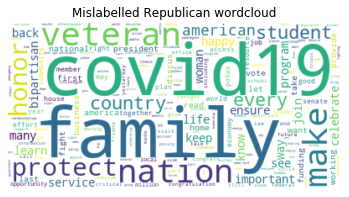

In [77]:
text_wc(mislabelled_R["Text"],"Mislabelled Republican wordcloud")

In [78]:
mislabelled_D = mislabelled_D.dropna(subset = ["Text"])

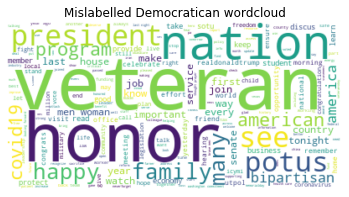

In [79]:
text_wc(mislabelled_D["Text"],"Mislabelled Democratican wordcloud")

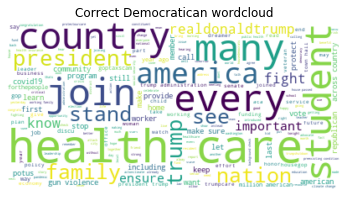

In [80]:
text_wc(correct_D["Text"],"Correct Democratican wordcloud")

In [81]:
correct_R = correct_R.dropna(subset = ["Text"])

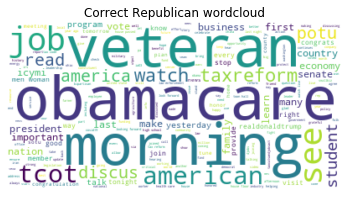

In [82]:
text_wc(correct_R["Text"],"Correct Republican wordcloud")

In [31]:
cong_tweets_data = pd.read_csv(training_input_path)
cong_tweets_data.head()

,Unnamed: 0,favorite_count,full_text,hashtags,retweet_count,year,party_id,Cleaned_Text,Cleaned_Text_WO_Stopwords,Cleaned_Tweets_Length,Cleaned_Tweets_WO_Stopwords_Length
0,0,0,"b""RT @KUSINews: One of our longtime viewers wa...",KUSI,10,2017.0,R,One our longtime viewer wa Congressman office ...,one longtime viewer congressman office sent aw...,88,62
1,1,258,"b""Today I'm urging the @CDCgov to immediately ...",Coronavirus,111,2020.0,R,Today urging the immediately launch phone hotl...,urging immediately launch phone hotline addres...,250,212
2,2,0,"b'Tomorrow, #MO03 seniors graduate from Calvar...",MO03,2,2014.0,R,Tomorrow MO03 senior graduate from Calvary Lut...,tomorrow mo03 senior graduate calvary lutheran...,109,100
3,3,9,b'Congrats to #TeamUSA and Canton Native @JGre...,TeamUSA WorldJuniors,3,2017.0,R,Congrats TeamUSA and Canton Native winning the...,congrats teamusa canton native winning worldju...,100,91
4,4,3,b'Pleased to support @amergateways at their Ju...,ImmigrantHeritageMonth,3,2019.0,D,Pleased support their June Fiesta which honore...,pleased support june fiesta honored immigranth...,250,228


In [32]:
cong_tweets_data.isna().sum()

Unnamed: 0                                0
favorite_count                            0
full_text                                 0
hashtags                                  0
retweet_count                             0
year                                  18712
party_id                                  0
Cleaned_Text                            216
Cleaned_Text_WO_Stopwords               227
Cleaned_Tweets_Length                     0
Cleaned_Tweets_WO_Stopwords_Length        0
dtype: int64

In [ ]:
missing_sw_ata = cong_tweets_data[cong_tweets_data["Cleaned_Text_WO_Stopwords"].isna()]
missing_sw_ata

In [ ]:
print(cong_tweets_data.shape)
cong_tweets_wo_na = cong_tweets_data.dropna(subset = ["Cleaned_Text_WO_Stopwords"])
print(cong_tweets_wo_na.shape)

In [39]:
u = string.punctuation.replace("#","")  
lemmatizer = WordNetLemmatizer()
cachedStopWords = stopwords.words("english")
custom_sw = ["today","thank","thanks","need","small","business","support","help","american","time","day","great","family","coomunity","new","veteran"]
cachedStopWords.extend(custom_sw)
def clean_tweets(tweets_text,sw_rem):
    
    #print(tweets_text)
    #print("\n")
    tweets_text = re.sub("b['\"]","",tweets_text)
    tweets_text = re.sub('http\S+',"",tweets_text)
    #tweets_text = re.sub('#[A-Za-z0-9]*',"",tweets_text)
    tweets_text = re.sub('@[A-Za-z0-9]*',"",tweets_text)
    tweets_text = re.sub(r'[\\]n'," ",tweets_text)
    tweets_text = re.sub(r'[\\]x[a-f0-9][a-f0-9]',"",tweets_text)
    tweets_text = re.sub(r'(&amp;)|RT ',"",tweets_text)
    if sw_rem==1:
        cachedStopWords = stopwords.words("english")
        regexes= r'\b(' + r'|'.join(cachedStopWords) + r')\b\s*'
        tweets_text = re.sub(regexes,"",tweets_text.lower())
    new_string = tweets_text.translate(str.maketrans('', '', u))
    tokenized_string = new_string.split(" ")
    without_digit = [i for i in tokenized_string if not i.isdigit()]
    no_small_words_text = [i for i in without_digit if len(i)>2]  #Removing short characters 
    lemmatized_string_list = [lemmatizer.lemmatize(word) for word in no_small_words_text if word!=""]
    lemmatized_string = " ".join(lemmatized_string_list)
    #print(new_string)
    #print("\n")
    return lemmatized_string

In [43]:
sample_str = cong_tweets_data["full_text"].iloc[110]
print(sample_str)
clean_tweets(sample_str,1)

b'America\xe2\x80\x99s higher education system is broken. Yesterday, we introduced a bold proposal to fix it. The #CollegeAffordabilityAct is a responsible, comprehensive plan to cut the cost of college so our students can spend less and earn more. https://t.co/Y2UABWNjSb'


'america higher education system broken yesterday introduced bold proposal fix #collegeaffordabilityact responsible comprehensive plan cut cost college student spend le earn'